## 範例重點
### 學習在模型開始前檢查各個環節
1. 是否有 GPU 資源
2. 將前處理轉為函式，統一處理訓練、驗證與測試集
3. 將超參數變數化，易於重複使用函式、模型等

In [1]:
## 確認硬體資源 (如果你是在 Linux, 若是在 Windows, 請參考 https://blog.csdn.net/idwtwt/article/details/78017565)
!nvidia-smi

'nvidia-smi' 不是內部或外部命令、可執行的程式或批次檔。


In [2]:
import os
import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [8]:
x_train, y_train = train
x_test, y_test = test
print(x_train.shape)

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
print(x_train.shape)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

(50000, 32, 32, 3)
(50000, 3072)


In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [11]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [12]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [13]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 15s 297us/step - loss: 1.9525 - accuracy: 0.2977 - val_loss: 1.8024 - val_accuracy: 0.3462
Epoch 2/100
50000/50000 [==============================] - 15s 297us/step - loss: 1.7221 - accuracy: 0.3828 - val_loss: 1.6575 - val_accuracy: 0.4068
Epoch 3/100
50000/50000 [==============================] - 14s 283us/step - loss: 1.6285 - accuracy: 0.4193 - val_loss: 1.5818 - val_accuracy: 0.4280
Epoch 4/100
50000/50000 [==============================] - 14s 280us/step - loss: 1.5446 - accuracy: 0.4486 - val_loss: 1.5275 - val_accuracy: 0.4580
Epoch 5/100
50000/50000 [==============================] - 14s 280us/step - loss: 1.5096 - accuracy: 0.4590 - val_loss: 1.5097 - val_accuracy: 0.4590
Epoch 6/100
50000/50000 [==============================] - 14s 279us/step - loss: 1.4721 - accuracy: 0.4744 - val_loss: 1.5235 - val_accuracy: 0.4555
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 14s 288us/step - loss: 0.5733 - accuracy: 0.7957 - val_loss: 1.8550 - val_accuracy: 0.5276
Epoch 56/100
50000/50000 [==============================] - 14s 289us/step - loss: 0.5646 - accuracy: 0.7967 - val_loss: 1.8683 - val_accuracy: 0.5185
Epoch 57/100
50000/50000 [==============================] - 14s 289us/step - loss: 0.5382 - accuracy: 0.8079 - val_loss: 1.9866 - val_accuracy: 0.5085
Epoch 58/100
50000/50000 [==============================] - 14s 288us/step - loss: 0.5485 - accuracy: 0.8039 - val_loss: 1.9260 - val_accuracy: 0.5225
Epoch 59/100
50000/50000 [==============================] - 14s 287us/step - loss: 0.5396 - accuracy: 0.8046 - val_loss: 1.9259 - val_accuracy: 0.5239
Epoch 60/100
50000/50000 [==============================] - 14s 285us/step - loss: 0.5251 - accuracy: 0.8120 - val_loss: 2.0546 - val_accuracy: 0.5210
Epoch 61/100
50000/50000 [==============================] - 14s 284us/step - loss: 0.5079 - ac

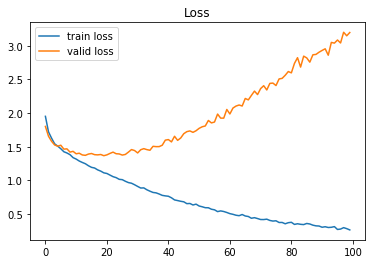

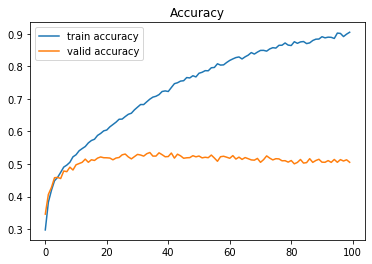

In [15]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度